In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt




In [10]:
import numpy as np
from sklearn.linear_model import Lasso, RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load your true image and measurements here
# true_image = ...
# measurements = ...

data1 = loadmat('data/cs.mat')
im = data1['img'].reshape(50,50,1).T
true_image = im

# Create a random design matrix A (1300x2500)
np.random.seed(42)
A = np.random.normal(0, 1, (50, 50))

# Add noise to measurements
epsilon = np.random.normal(0, 50, 50)
y = A.dot(true_image) + epsilon

# Lasso Regression for Image Recovery
alphas = np.logspace(-4, 4, 100)
lasso_cv_errors = []
lasso_recovered_images = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    cv_scores = cross_val_score(lasso, A, y, cv=10, scoring='neg_mean_squared_error')
    lasso_cv_errors.append(-np.mean(cv_scores))
    lasso.fit(A, y)
    lasso_recovered_images.append(lasso.coef_)

optimal_alpha_lasso = alphas[np.argmin(lasso_cv_errors)]
recovered_image_lasso = lasso_recovered_images[np.argmin(lasso_cv_errors)]

# Ridge Regression for Image Recovery
alphas = np.logspace(-4, 4, 100)
ridge_cv_errors = []
ridge_recovered_images = []

for alpha in alphas:
    ridge = RidgeCV(alphas=[alpha])
    cv_scores = cross_val_score(ridge, A, y, cv=10, scoring='neg_mean_squared_error')
    ridge_cv_errors.append(-np.mean(cv_scores))
    ridge.fit(A, y)
    ridge_recovered_images.append(ridge.coef_)

optimal_alpha_ridge = alphas[np.argmin(ridge_cv_errors)]
recovered_image_ridge = ridge_recovered_images[np.argmin(ridge_cv_errors)]

# Plot Cross-validation Error Curves
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(alphas, lasso_cv_errors)
plt.xlabel('Alpha (λ) for Lasso')
plt.ylabel('Cross-validation Error')
plt.title('Lasso Cross-validation Error Curve')
plt.xscale('log')

plt.subplot(122)
plt.plot(alphas, ridge_cv_errors)
plt.xlabel('Alpha (λ) for Ridge')
plt.ylabel('Cross-validation Error')
plt.title('Ridge Cross-validation Error Curve')
plt.xscale('log')

plt.show()

# Display Recovered Images
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(recovered_image_lasso.reshape(50, 50), cmap='gray')
plt.title('Recovered Image (Lasso)')

plt.subplot(122)
plt.imshow(recovered_image_ridge.reshape(50, 50), cmap='gray')
plt.title('Recovered Image (Ridge)')

plt.show()

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/patrickgardocki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/patrickgardocki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py", line 908, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/patrickgardocki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/patrickgardocki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1122, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/patrickgardocki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1132, in _check_y
    y = check_array(
        ^^^^^^^^^^^^
  File "/Users/patrickgardocki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py", line 915, in check_array
    raise ValueError(
ValueError: Found array with dim 3. Lasso expected <= 2.


In [19]:
import numpy as np
import scipy.io
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load data from .mat file
data = scipy.io.loadmat('data/cs.mat')

# Extract the true image and measurements
true_image = data['img']


# Create a random design matrix A (1300x2500)
np.random.seed(42)
A = np.random.normal(0, 1, (1300, 2500))

# Add noise to measurements
epsilon = np.random.normal(0, 25, (1300,1300))
y = A.dot(true_image.ravel()) + epsilon

# Perform Lasso with Cross-validation
alphas = np.logspace(-4, 4, 100)
lasso = LassoCV(alphas=alphas, cv=10)
lasso.fit(A, y)

# Get the optimal λ (alpha) chosen by LassoCV
optimal_alpha = lasso.alpha_

# Get the coefficients for the optimal alpha
recovered_image = lasso.coef_

# Plot Cross-validation Error Curve
cv_errors = -cross_val_score(lasso, A, y, cv=10, scoring='neg_mean_squared_error')
plt.figure(figsize=(8, 4))
#plt.semilogx(lasso.alphas_, cv_errors, marker='o')
plt.xlabel('Alpha (λ)')
plt.ylabel('Cross-validation Error')
plt.title('Lasso Cross-validation Error Curve')
plt.grid(True)

# Display Recovered Image
recovered_image = recovered_image.reshape(50, 50)
plt.figure(figsize=(6, 6))
plt.imshow(recovered_image, cmap='gray')
plt.title('Recovered Image (Lasso)')
plt.axis('off')

plt.show()


ValueError: For multi-task outputs, use MultiTaskLassoCV

In [32]:
y = A.dot(true_image.ravel()) + epsilon
y.shape
plt.imshow(y.reshape(50,50),cmap='gray')

ValueError: cannot reshape array of size 1690000 into shape (50,50)

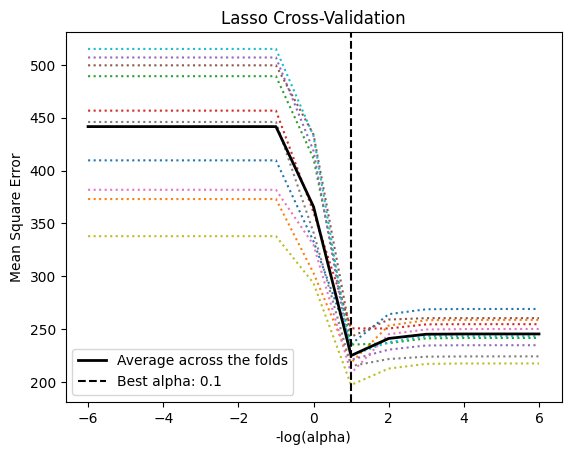

In [99]:
# Generate random data
#np.random.seed(0)
n = 1300
p = 2500
A = np.random.randn(n, p)
x_true = np.random.randn(p)
data = scipy.io.loadmat('data/cs.mat')

# Extract the true image and measurements
true_image = data['img']
epsilon = 5 * np.random.randn(n)
y = A.dot(true_image.ravel()) + epsilon


# Perform 10-fold cross-validation
alphas = np.logspace(-6, 6, 13)
lasso_cv = LassoCV(alphas=alphas,cv=10)
lasso_cv.fit(A, y)
best_lambda = lasso_cv.alpha_


# Plot the cross-validation error curve
m_log_alphas = -np.log10(lasso_cv.alphas_)

plt.figure()
plt.plot(m_log_alphas, lasso_cv.mse_path_, ':')
plt.plot(m_log_alphas, lasso_cv.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(best_lambda), linestyle='--', color='k',
            label='Best alpha: %s' % round(best_lambda, 5))

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean Square Error')
plt.title('Lasso Cross-Validation')
plt.axis('tight')
plt.show()




In [100]:
# Recover the image using the selected lambda
lasso = Lasso(alpha=best_lambda)
lasso.fit(A, y)
recovered_image = lasso.coef_


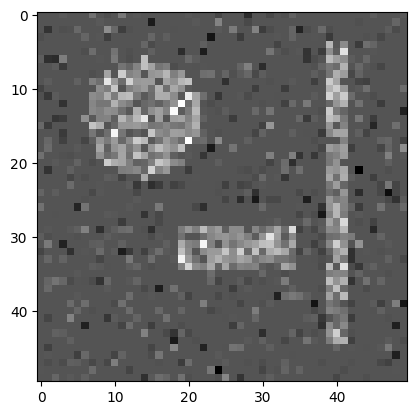

In [101]:

plt.imshow(recovered_image.reshape(50,50),cmap='gray')


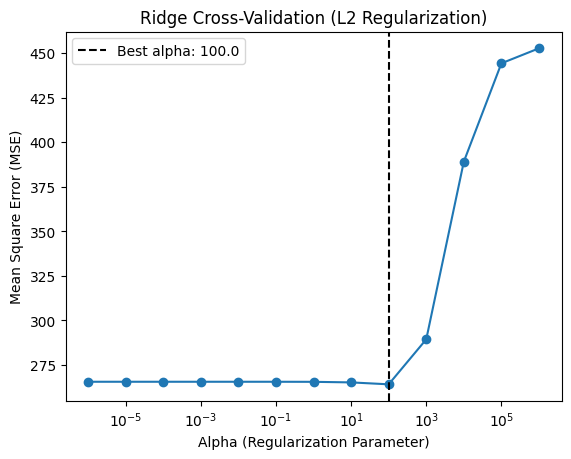

In [93]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
# Specify a range of alpha values to test
alphas = np.logspace(-6, 6, 13)
cv_errors = []

# Perform 10-fold cross-validation for Ridge regression with L2 regularization
kf = KFold(n_splits=10)
for alpha in alphas:
    errors = np.zeros(10)
    for i, (train_index, test_index) in enumerate(kf.split(A)):
        X_train, X_test = A[train_index], A[test_index]
        y_train, y_test = y[train_index], y[test_index]

        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train, y_train)
        y_pred = ridge.predict(X_test)
        errors[i] = np.mean((y_test - y_pred) ** 2)
    cv_errors.append(np.mean(errors))

best_alpha = alphas[np.argmin(cv_errors)]

# Plot the cross-validation error curve
plt.figure()
plt.semilogx(alphas, cv_errors, marker='o')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('Mean Square Error (MSE)')
plt.title('Ridge Cross-Validation (L2 Regularization)')
plt.axvline(best_alpha, linestyle='--', color='k', label='Best alpha: %s' % best_alpha)
plt.legend()
plt.show()

# Recover the image using Ridge regression with the selected alpha
ridge = Ridge(alpha=best_alpha)
ridge.fit(A, y)
recovered_image = ridge.coef_

In [76]:
ridge_cv = RidgeCV(alphas=(1e-8, 1e-4, 1e-2, 1.0, 4, 8,  10.0, 12, 15, 20), cv=10)
ridge_cv.fit(A, y)
print("Best model searched:\nalpha = {}\nintercept = {}\nbetas = {}, ".format(ridge_cv.alpha_,
                                                                            ridge_cv.intercept_,
                                                                            ridge_cv.coef_
                                                                            )
     )

ridge = Ridge(alpha=best_alpha)
ridge.fit(A, y)
recovered_image = ridge.coef_

Best model searched:
alpha = 20.0
intercept = -0.6699749209136349
betas = [-0.19514221 -0.24872268  0.05863515 ...  0.04067907  0.02662244
  0.40373794], 


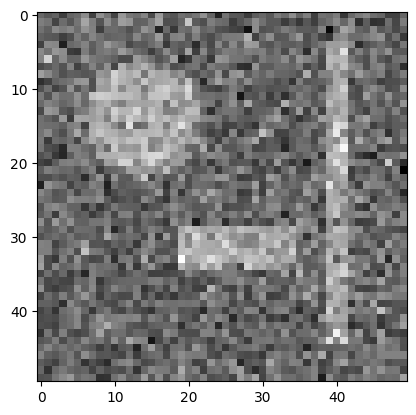

In [97]:
plt.imshow(recovered_image.reshape(50,50),cmap='gray')